#Дерево решений

##Определение

Решающие деревья относятся к наиболее интуитивным и хорошо интерпретируемым моделям машинного обучения, разрушая стереотип об ИИ как чёрном ящике в самых основах этого утверждения.

**Решающее дерево** ($decision\ tree$) — средство принятия решений в машинном обучении, реализующее структуру данных дерево и состоящее в задаче вопросов к признакам для предсказания значения целевой переменной.

##Пример. Кредитный скоринг

Приведём аналогию с выдачей **кредита** на основе данных о заёмщике. Эксперт, работающий в банке, может предложить примерный алгоритм из вопросов, задавая которые определяется, стоит ли выдавать клиенту кредит или нет.

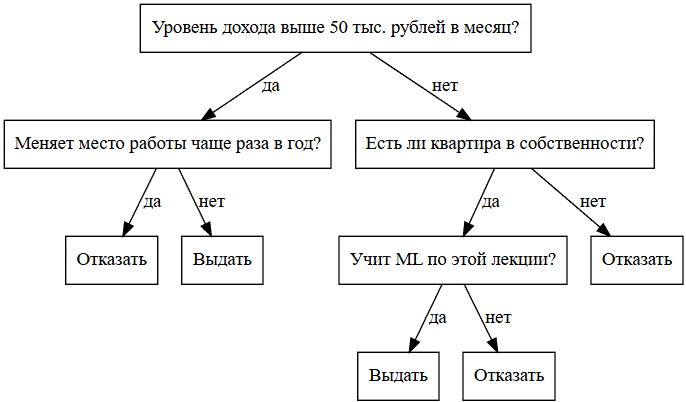

Так и устроено решающее дерево. Из всего доступного множества вопросов к признакам пытаемся задавать наиболее информативные.

**Предикат** — это условие, используемое для разделения данных на различные группы. Каждый отдельный предикат находится в собственном узле дерева.

Выше мы решали задачу бинарной **классификации**: выдавать кредит или нет. Заметим, что аналогичным образом дерево решений можно использовать и для **регрессии**.

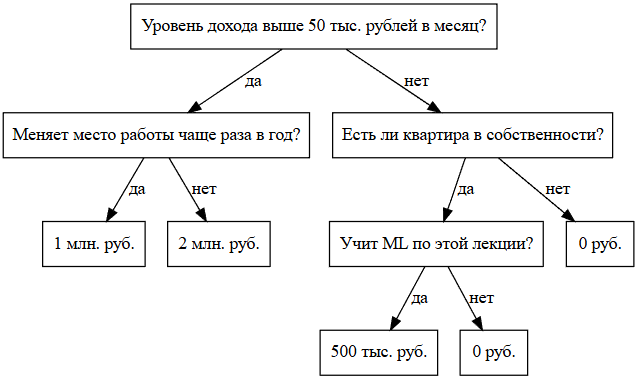

Теперь в листьях дерева не ответы да/нет, а значения целевой переменной из заданного диапазона.

##Формализация

###Постановка задачи

Ограничимся бинарными деревьями, то есть теми, у которых каждый узел имеет не более двух дочерних узлов. Будем считать, что каждый отдельный предикат применяется только к одному из признаков.

Пусть $n$ — количество рассматриваемых **признаков** объекта:

$$x = (x_1, x_2, ..., x_n) = \{ x_i \}_{i=1}^{m},$$

Каждому **узлу** ($edge$) приписан **предикат** $B_e$, применяемый только к одному $j$-му признаку. Дерево бинарное, поэтому узел разделяет данные на две части, то есть решает задачу бинарной классификации:

$$B_e(x_j) \rightarrow \{0,\ 1\}$$

В каждом **листе** (leaf) дерево предсказывает приписанное ему значение $y_l$ из заданного множества значений целевой переменной $Y$:

$$y_l \in Y$$

###Алгоритм предсказания с помощью дерева решений

1. Начинаем движение с **корня**.
2. Движемся от строго вниз по иерархии. В текущем **узле**, если предикат выполняется, движемся вправо. Иначе влево.
3. Если достигли **листа**, за предсказание принимаем приписанное ему значение $y_l$. Иначе возвращаемся к шагу 2.

###Предикаты

Несмотря на то предикаты можно было бы задавать сложными функциями, на практике используют простые пороговые методы:

$$B_e(x_j) = [x_j \leq t_e]$$

В узле $e$ выбирается некоторый **порог** ($threshold$) $t_e$. Если значение целевой переменной $x_j$ выше порога, предикат даёт значение $1$ (истина). Иначе $0$ (ложь).

##Значения в листьях

Существуют различные подходы к определению значения целевой переменной в листьях. Например, в случае **регрессии**, в каждом листе можно использовать простой линейный регрессор, который в зависимости от значения признака выдаёт различные ответы $y_l$:

$$y_l = \sum_{i=1}^n w_i x_i$$

На деле поступают проще. Используется **константное приближение**, то есть каждый лист предсказывает некое число, характеризующее данные, которые в этот лист попадают.

В случае **классификации** это может быть метка наиболее часто встречающегося класса. Допустим, в узел попадает $P$ объектов из обучающей выборки с метками $y^j$. Всего среди них $K$ различных меток. Тогда значение $y_l$ в листе:

$${y}_l = k \in K: \sum_{j=1}^{P} I(y^j = k) \rightarrow max$$

В случае **регрессии** можно использовать одну из статистик набора данных, попадающих в лист: среднее значение, медиану, моду и т. д. К выбору статистики следует подходить с осторожностью, так как каждая из них несёт разную информацию.


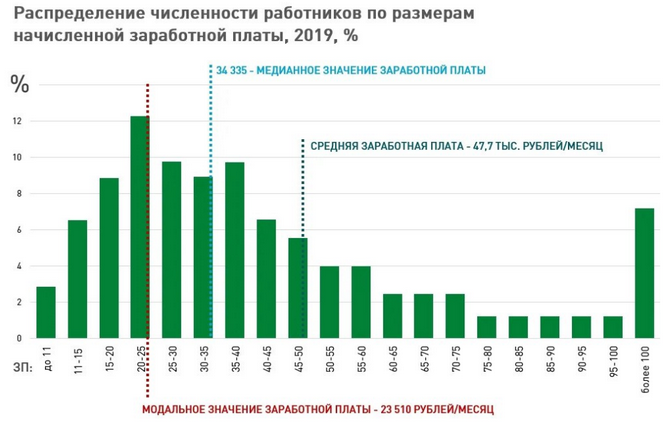

**Среднее значение** равно сумме значений целевой переменной, делённой на количество переменных:

$$y_{mean}=\frac{1}{P} \sum_{j=1}^{P} y^j$$

Среднее неустойчиво по отношению к выбросам. Несколько слишком больших или маленьких значений вызывают его перевес в ту или иную сторону, так что среднее становится неинформативным.

**Медиана**: ровно у половины объектов значение больше этого значения, а у другой — меньше.

**Мода** — наиболее частое значение. Хорошо подходит для дискретных величин, то есть принимающих значение из конечного набора. Именно эта статистика предложена выше в случае классификации.

По иллюстрации видно, что мода и среднее различаются могут различаться в разы и описывают одни и те же данные с разных сторон

###Пример константного приближения для одного признака

Так как каждый узел предсказывает константу, итоговое предсказание имеет кусочный характер, причём имеет разрывы в точках, соответствующих порогам. На иллюстрации приведён пример применения решающего дерева к **косинусоиде**.

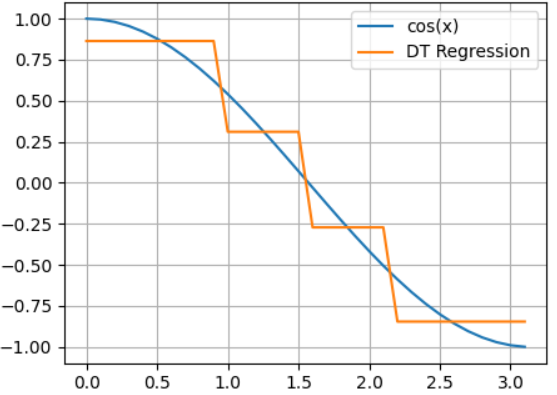

###Пример константного приближения для двух признаков

В случае двух признаков область будет делиться не на отрезки, как было в одномерном случае, а на прямоугольники. Ниже проиллюстрировано разбиение на 4 области

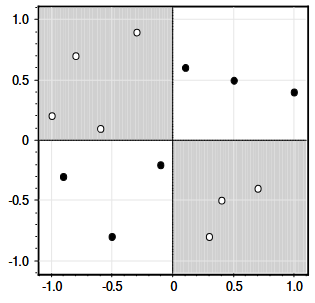

##Построение решающего дерева



Вопросов к признакам можно задавать множество, причём не ясно, какой выбрать первым. Особенно в случаях, когда признаков много.

Появляется проблема, что решающее дерево строится **неоднозначно**. С другой стороны, мы можем строить его с использованием жадного алгоритма:

**Жадный алгоритм** — это метод решения задач, который на каждом шаге принимает наиболее оптимальное на данный момент действие без учета последствий.

При построении дерева в каждом узле будем пытаться достичь наиболее информативного разделения (сплита, $split$) и строить дерево поэтапно, узел за узлом.

1. В дереве создаём новый **узел** $e$.
2. В этот узел попадают $P$ объектов из обучающей выборки, обозначим их как $X_P = \{(x^j, y^j)\}_{j=1}^P$.
- Если выполняется критерий остановки $Stop(X_P)$, объявляем узел **листом** $l$ и ставим ему в соответствие $y_l$ на основе данных об $X_P$, как описано выше.
- Иначе находим сплит $B_e(x_j)$, максимизирующий критерий ветвления $Branch(X_P, B_e)$ при **делении** $X_P$ на $X_L$ ($left$) и $X_R$ ($right$).
3. **Возвращаемся** к шагу 1, создавая два отдельных узла для $X_L$ и $X_R$.

###Критерий остановки

$Stop(X_P)$ можно определить как одно из следующих условий:

1. **Impurity**, то есть неоднородность, неопределённость данных, равна нулю или меньше заданного порога.
2. Достигнута максимальная **глубина** дерева или максимальное допустимое число **листьев**.
3. **Вероятность** правильной классификации уже выше минимальной требуемой.
4. **Число объектов** меньше минимального разрешённого числа объектов в узле.

###Критерий ветвления

Если мы принимаем узел за лист $l$, то значение целевой переменной в нём приближаются константой $y_l$. Введём функцию потерь $L(y^j, y_l)$. Это может быть RMSE, MAE и прочие. Тогда для $P$ попадающих в узел объектов средняя ошибка:

$$\frac{1}{P} \sum_{(x^j, y^j) \in X_P} L(y^j, y_l)$$

Получили **критерий информативности**. Обозначим его минимальное значение (минимум по всем $y_l$) как $H(X_P)$. Чем однороднее данные, то есть чем лучше приближаются константой, тем меньше информации они несут.

Так как $X_P$ состоит из двух частей $X_P=X_L \cup X_R$, которые затем попадают в левый и правый узел, то формулу можно переписать:

$$H(X_P)= \frac{1}{P} \left(\sum_{(x^j, y^j) \in X_L} L(y^j, y_l)\ + \sum_{(x^j, y^j) \in X_R} L(y^j, y_l)\right)$$

Суммарная информативность при делении, когда для левого и правого узлов выбираются константы $y_{lL}$ и $y_{lR}$:

$$H(X_L) = \frac{1}{L} \sum_{(x^j, y^j) \in X_L} L(y^j, y_{lL})$$
$$H(X_R) = \frac{1}{R} \sum_{(x^j, y^j) \in X_R} L(y^j, y_{lR})$$

**Критерий ветвления** можно записать, например, как:

$$Branch(X_P, B_e) = P \cdot H(X_P) - L \cdot H(X_L) - R \cdot H(X_R)$$

Эта величина неотрицательна: разделение данных не сделает приближение хуже. Чем лучше разделяются данные, тем критерий выше. Поэтому мы стремимся к максимизации данной величины.

##Энтропия Шеннона

Под **энтропией** понимают меру неопределённости, беспорядка. А задача классификации, которую мы хотим решить, есть задача упорядочивания, устранения неопределённости. Поэтому применима формула информационной энтропии **Клода Шеннона**:

$$H(X) = -\sum_{i=1}^{n} p_i \log_2(p_i)$$

Эта формула позволяет получить информацию в битах об $n$ событий, происходящих с вероятностями $p_i$.

###Пример

Предположим, в корзине находится 5 красных и 3 синих шарика. Необходимо решить задачу бинарной классификации, то есть поставить перегородку, которая разделит шарики разных цветов наилучшим образом.

Под событиями, к которым применим формулу Шеннона, подразумевается определение цвета шарика, взятого из определённой части корзины.

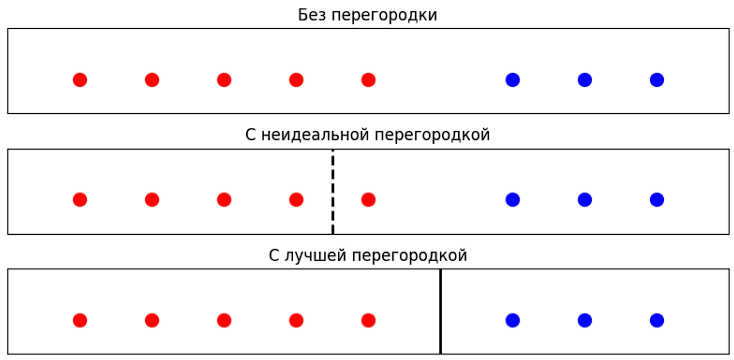

####Без перегородки

Когда перегородки ещё не было, вероятность выбрать красный шарик:
$$p(\text{красный}) = \frac{5}{8} = 0.625$$

Вероятность выбрать синий шарик:
$$p(\text{синий}) = \frac{3}{8} = 0.375$$

Воспользуемся формулой Шеннона для вычисления энтропии $H(X)$. Подставим значения:

$$H(X) = -\left( p(\text{красный}) \log_2(p(\text{красный})) - p(\text{синий}) \log_2(p(\text{синий})) \right)$$

$$H(X) \approx 0.955 \text{ бит}$$


####Неидеальная перегородка

Пусть перегородка случайно включает в правую группу 1 красный и 3 синих шарика. В этой группе вероятность выбрать красный шарик:

$$p(\text{красный}) = \frac{1}{4} = 0.25$$

Вероятность выбрать синий шарик:

$$p(\text{синий}) = \frac{3}{4} = 0.75$$

Энтропия составит:

$$H_{\text{право}} \approx 0.811$$

Слева все шарики красные. Это полный порядок, энтропия нулевая:

$$H_{\text{лево}} = 0$$

Суммарная энтропия:

$$H(X) = H_{\text{лево}} + H_{\text{право}} = 0.811\text{ бит}$$


####Идеальная перегородка

В данном случае каждая группа состоит только из одного цвета. Для каждой группы энтропия ноль. Тогда:

$$H(X) = H_{\text{лево}} + H_{\text{право}} = 0 + 0 = 0 \text{ бит}$$

####Информационный прирост

Найдём **информационный прирост** ($information\ gain$, IG) в контексте ветвления. Будем использовать его как критерий $Branch(X_P, B_e)$:

$$IG(X_P, B_e) = H(X_P) - \frac{L}{P} \cdot H(X_L) - \frac{R}{P} \cdot H(X_R)$$

При переходе от случая без разбиения (нет перегородки) к неидельному разбиению:

$$IG = 0.955 - \frac{4}{8} \cdot 0.811 - 0 = 0.550$$

В идеальном случае:

$$IG = 0.955 - 0 - 0 = 0.955$$

Эти примеры в явном виде показывают, что деление на группы с нулевой неопределённостью наиболее информативно, то есть даёт наибольший информационный прирост. Именно к этому мы стремимся, выбирая тот или иной порог $t_e$ в предикате $B_e$.

## Пример решения традиционной задачи. Классификация ирисов Фишера

###Постановка задачи

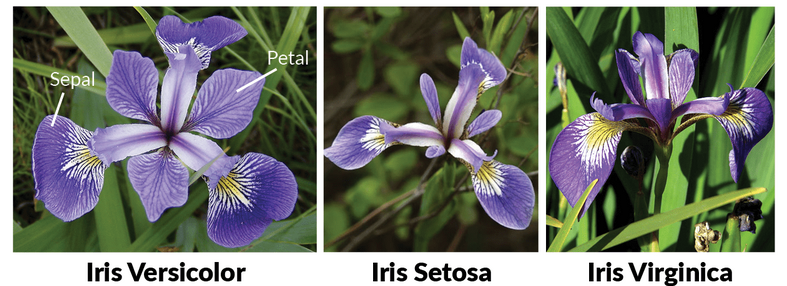

Рассмотрим известный датасет, использованный статистиком и генетиком **Рональдом Фишером** в 1936 г. Приведены данные о 150 образцах ирисов трёх видов: разноцветные (versicolor), щетинистые (setosa), виргинские (virginica) — по 50 на вид.

Необходимо **классифицировать** цветы. Целевая переменная — метка класса. Всего 4 признака: длина и ширина чашелистика (sepal), длина и ширина лепестка (petal).

Для наглядности — возможности отображать разделение на графике — ограничимся **двумя признаками**, а именно длиной и шириной лепестка. Такой выбор неслучаен: они наиболее информативны. Это видно при обучении дерева на всех четырёх признаках.

Импортируем основные библиотеки для анализа данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Датасет уже представлен в библиотеке `sklearn`. Оставим первые два признака.

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
feature_names = iris.feature_names[2:4]
labels = iris.target_names

Выведем 10 примеров объектов из датасета.

In [ ]:
import pandas as pd

df = pd.DataFrame({
    feature_names[0]: X[:, 0],
    feature_names[1]: X[:, 1],
    'target': y,
    'name': labels[y]
})

df.sample(n=10, random_state=42)

,petal length (cm),petal width (cm),target,name
73,4.7,1.2,1,versicolor
18,1.7,0.3,0,setosa
118,6.9,2.3,2,virginica
78,4.5,1.5,1,versicolor
76,4.8,1.4,1,versicolor
31,1.5,0.4,0,setosa
64,3.6,1.3,1,versicolor
141,5.1,2.3,2,virginica
68,4.5,1.5,1,versicolor
82,3.9,1.2,1,versicolor


###Визуализатор классификации по двум признакам

Реализуем функцию отображения классификации на плоскости. На вход будет поступать экземпляр используемой модели, именно решающего дерева. Также это будут значения признаков $X$ и меток $y$ объектов, оси и цветовая карта:

```python
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
```

Если в функцию передаются оси `ax` из `matplotlib` для построения графика, используем их. Иначе создаём свои:

```python
    ax = ax or plt.gca()
```

Разместим на графике переданные в функцию объекты в виде точек.

```python
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, edgecolor='black',
               clim=(y.min(), y.max()), zorder=3)
```

Разобъём график на **сетку** из $200 \times 200 = 40000$ квадратиков. Для каждого квадратика с помощью переданного в фунцию дерева предскажем метку класса $Z$.

```python
    model.fit(X, y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(*xlim, num=200),
        np.linspace(*ylim, num=200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
```

Покрасим квадратики сетки с помощью функции `contour fill`:

```python
    n_classes = len(np.unique(y))
    contours = ax.contourf(
        xx, yy, Z, alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap=cmap, zorder=1
    )
```

Подгоним оси под более аккуратный формат:

```python
    ax.axis('tight')
    ax.axis('off')
    ax.set(xlim=xlim, ylim=ylim)
```

Соберём код в одной ячейке и запустим.

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='plasma'):
    ax = ax or plt.gca()

    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, edgecolor='black',
               clim=(y.min(), y.max()), zorder=3)

    model.fit(X, y)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(*xlim, num=200),
        np.linspace(*ylim, num=200)
    )
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(
        xx, yy, Z, alpha=0.3,
        levels=np.arange(n_classes + 1) - 0.5,
        cmap=cmap, zorder=1
    )

    ax.axis('tight')
    ax.axis('off')
    ax.set(xlim=xlim, ylim=ylim)


###Решение задачи

Разделим выборку для тренировочную и тестовую.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Стандартизируем признаки.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Инициализируем и обучим модель.

Как мы убедились в теоретической части, решающие деревья крайне разнообразны в своём устройстве, оттого их реализация с нуля трубует временных затрат.

В рамках этого занятия ограничимся готовым решающим деревом из библиотеки `sklearn`. Оно представляет собой продвинутую версию деревьев класса **CART** (Classification and Regression Trees).

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

Проанализируем результаты обучения. Решающие деревья хорошо интерпретируются, в `sklearn` реализован функционал вывода важности признаков.

In [ ]:
importances = tree.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

feature_importances.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,petal width (cm),0.587183
0,petal length (cm),0.412817


Ширина лепестка примерно в полтора раза важнее длины.

Возможность оценивать соотношение важности позволяет применять решающие деревья в задаче **отбора признаков**. Например, на занятии по логистической регрессии при анализе опухолей мы наугад отбросили часть сильно коррелирующих признаков. Более правильной методикой было бы оставить наиболее информативные.

Визуализируем результат обучения.

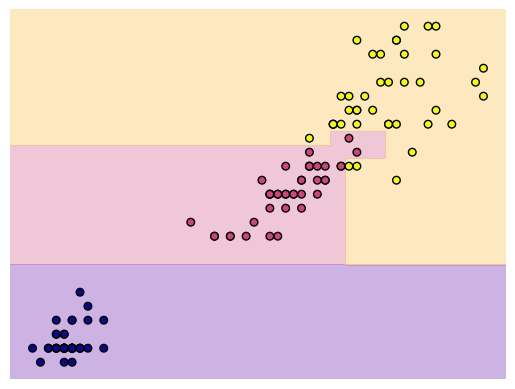

In [ ]:
visualize_classifier(tree, X_train, y_train)

Как видим, область разбита на прямоугольники, так как применяются пороговые методы. Обучение оставновилось на этапе, когда в каждой области остались объекты только одного класса. Область приближённо поделена на горизонтальные полосы, то есть деление в основном по одному признаку.

Сделаем предикт для тестовых данных.

In [ ]:
y_pred = tree.predict(X_test)

Оценим качество обучения по метрике $accuracy$.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 1.0


Дерево верно предсказало метку для 100% данных из тестовой выборки.

##Недостатки решающих деревьев

Решающие деревья склонны к **переобучению**. Они изначально строятся как подгон под обучающих данных с помощью простых порогов. Ещё деревья чувствительны к шуму: могут изменять границы исключительно из-за шумовых точек. На иллюстрации пример дерева с заданной максимальной глубиной $10$ для задачи классификации двух облаков точек.

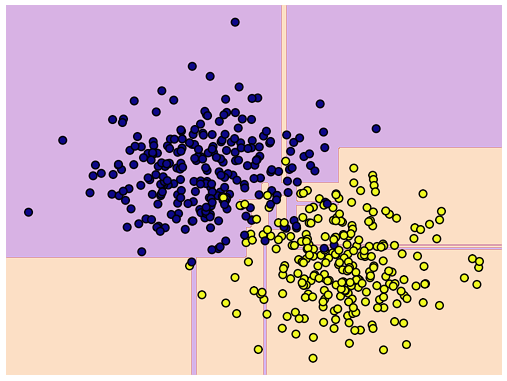

#Ансамблевые методы. Случайный лес

##Определение

Решающие деревья интуативно понятны в устройстве и хорошо интерпретируемы. Однако неоднозначность способа построения наилучшего дерева, а также склонность к переобучению делают алгоритм непривлекательным для применения при решении реальных задач.

С другой стороны, можно использовать множество таких простых алгоритмов, то есть **ансамбль**.

> «Вы хотите интерпретируемую модель или ту, которая работает?»
> Ян Лекун, 2017.

В контексте решающих деревьев ансамбль принято называть **лесом**. Используя лес, мы теряем интерпретируемость результата, тратим ресурсы на кратно большее количество деревьев, однако получаем мощную модель.

Рассмотрим несколько **подходов** к построению ансамбля.

##Бэггинг

Рассмотрим выборку из $X$ объектов $x$. **Бэггинг** (bagging, bootstrap aggregation) основан на взятии $n$ объектов из $X$ с возвращением, что создает новую выборку $X_1$. Возвращение означает, что в $X_1$ могут быть дубликаты. Повторяем операцию $K$ раз. Процесс формирования подвыборок называется **бутстрапом** (bootstrap).

На выборке $X_1$  обучается модель $b_1(x) = b(x, X_1)$. На $X_2$ — $b_2(x) = b(x, X_2)$. Так обучаем $K$ различных моделей $ b_1(x), b_2(x), \ldots, b_K(x) $.

Далее, если решается задача регрессии, усредняем ответ. В случае классификации берём моду. Сформированный таким образом лес называется  **случайным** ($Random\ Forest$).

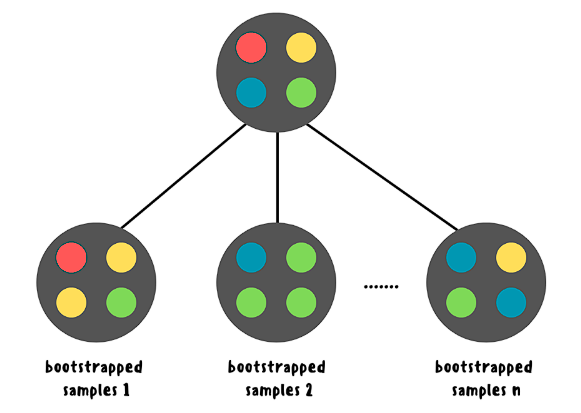

##Бустинг

При **бэггинге** простые алгоритмы обучаются **параллельно**. Это позволяет распараллелить вычисления, если, например, используется суперкомпьютер. С другой стороны, при таком подходе новые деревья не учитывают опыт обучения своих предшественников.

**Бустинг** — это метод ансамблевого обучения, который **последовательно** обучает слабые модели, каждая из которых исправляет ошибки предыдущей, чтобы создать одну мощную.

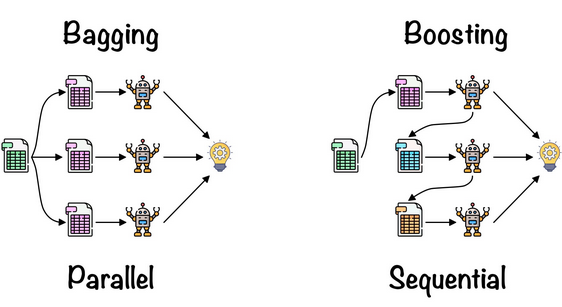

Рассмотрим градиентный бустинг на примере алгоритма **AdaBoost**:

1. Обучаем слабый классификатор — бинарное дерево — на выборке, где каждому объекту присваивается **вес**, означающий, насколько важно классифицировать именно этот объект. Изначально все веса равны

2. Создаём по дереву решений для каждого **признака**. Смотрим, сколько правильных и неправильных предиктов сделано для каждого признака.

3. Присваиваем больший **вес** ошибочно обработанным объектам. Присваиваем веса классификаторам: чем точнее, тем больше вес.

4. Возвращаемся к шагу 2 или **останавливаемся**, если все объекты классифицированы верно или достигнуто максимальное число итераций.

Программной оптимизацией алгоритма AdaBoost является, например, алгоритм **XGBoost** (Extreme Gradient Boosting). Отдельного упоминания стоит популярная библиотека **Catboost**, разработанная в «Яндексе» для эффективной работы с категориальными данными.

##Решение реальной задачи с Kaggle. Классификация звёзд, квазаров и галактик

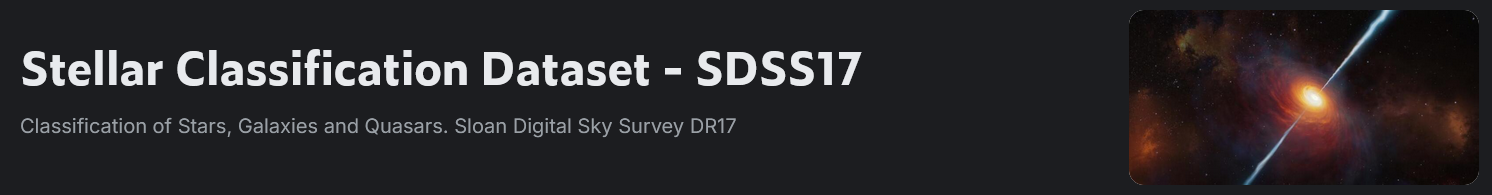

**Sloan Digital Sky Survey** (SDSS) — это крупномасштабный астрономический проект, направленный на картографирование ночного неба и сбор данных о множестве небесных тел.

Классификация звезд основана на их спектральных характеристиках и является одной из основ астрономии. Первоначальные каталоги звезд помогли понять устройство нашей галактики и выявить другие, такие как Андромеда.

Представенный [датасет](https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17) включает $100000$ наблюдений космоса, каждое из которых описывается 17 признаками и одной классом, определяющим, является ли объект звездой, галактикой или квазаром.

Необходимо предсказывать, к какому из этих **трёх классов** относится объект.

###Сбор данных

Установим библиотеку для скачивания датасета

In [2]:
!pip install -q opendatasets

Сохраним токен Kaggle в необходимой для opendatasets директории.

In [4]:
from google.colab import files
import os

uploaded = files.upload()

Saving kaggle.json to kaggle.json


Скачаем датасет.

In [5]:
import opendatasets as od

url = 'https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17'
od.download(url)

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17


100%|██████████| 6.89M/6.89M [00:00<00:00, 880MB/s]

In [6]:
os.listdir('./stellar-classification-dataset-sdss17')

['star_classification.csv']

###Исследование данных

Просмотрим данные.

In [7]:
data = pd.read_csv('./stellar-classification-dataset-sdss17/star_classification.csv')

In [8]:
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


Имеется 100000 записей с 18 признаками.

In [9]:
data.shape

(100000, 18)

Пропусков нет.

In [10]:
data.isna().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


Колонка `rerun_ID` заполнена одним числом $301$, впоследствии удалим её.

In [11]:
data.nunique()

,0
obj_ID,78053
alpha,99999
delta,99999
u,93748
g,92651
r,91901
i,92019
z,92007
run_ID,430
rerun_ID,1


Исследуем статистики датасета.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


Просмотрим соотношение классов.

In [13]:
data['class'].value_counts()

,count
class,
GALAXY,59445
STAR,21594
QSO,18961


Датасет несбалансирован, но это терпимо.

Построим гистограммы. Они показывают распределение каждого признака. По вертикали откладывается количество объектов, по горизонтали значения.

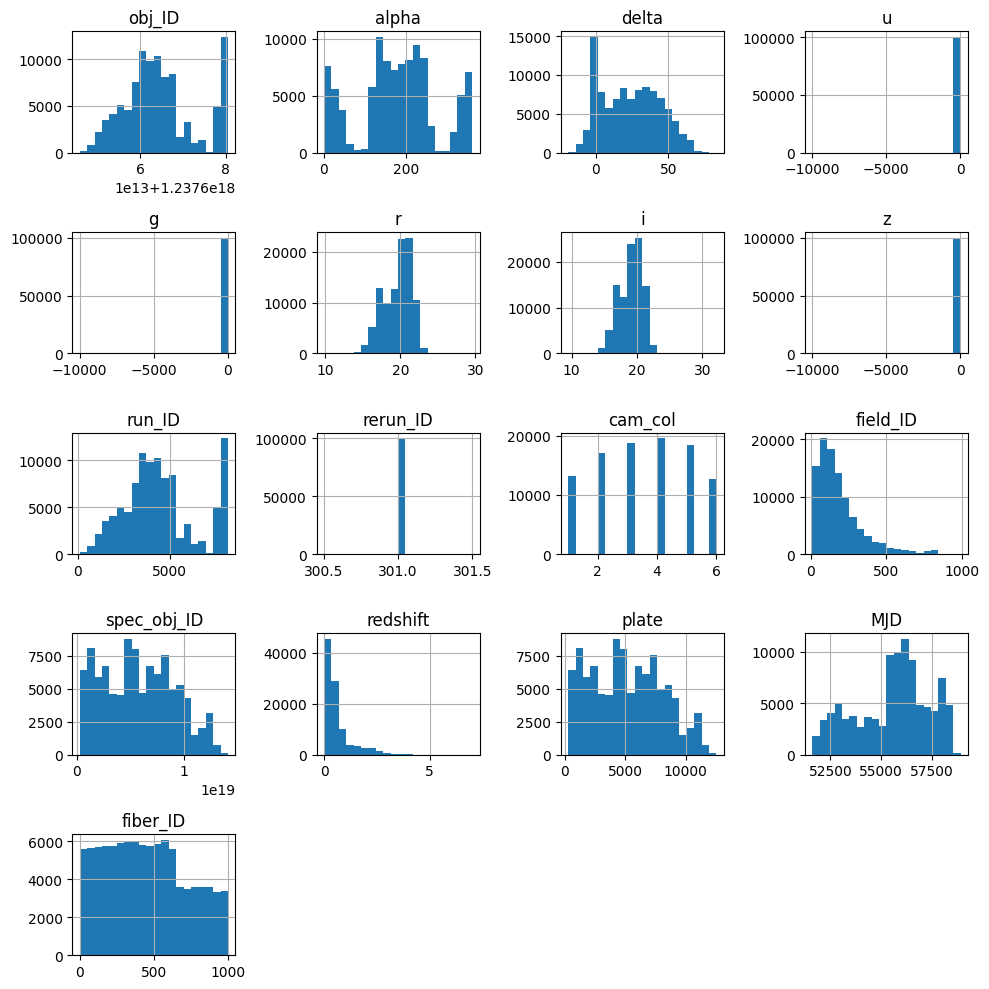

In [14]:
data.hist(bins=20, figsize=(10, 10))
plt.tight_layout()
plt.show()

Построим матрицу корреляции.

<Axes: >

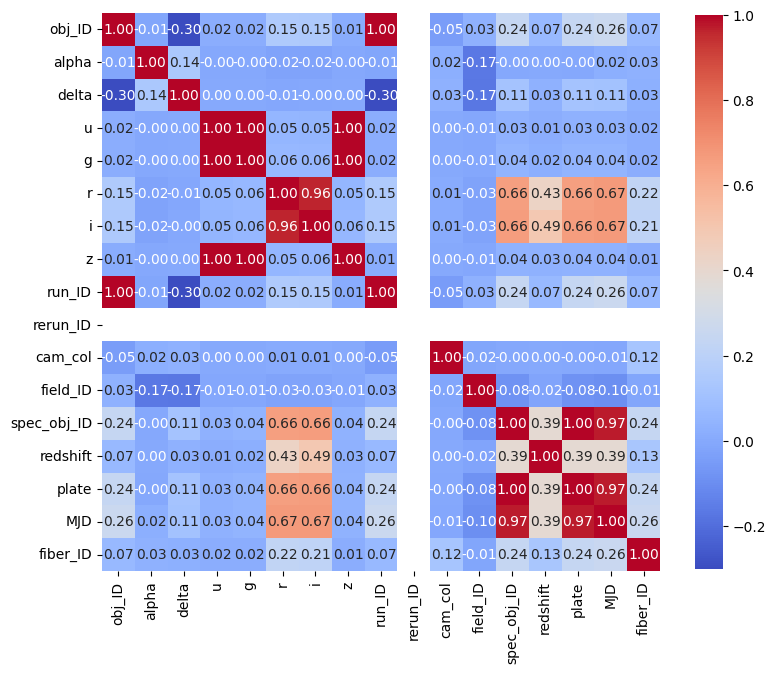

In [15]:
import seaborn as sns

corr = data.drop(columns=['class']).corr()
plt.figure(figsize=(9, 9))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

Многие признаки коррелируют.

###Подготовка данных

Закодируем названия классов. Перейдём от строк к меткам в виде чисел $0, 1, 2$.

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['class'] = encoder.fit_transform(data['class'])

In [17]:
data['class'].value_counts()

,count
class,
0,59445
2,21594
1,18961


Оставим исключим данные, связанные со сбором датасета, то есть различные ID. Разобьём данные на признаки и целевую переменную.

In [38]:
X = data.drop(columns=['class','obj_ID','run_ID','rerun_ID','cam_col','spec_obj_ID','field_ID','plate','MJD','fiber_ID'], axis=1)
y = data['class']

Стандартизируем данные.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Разобъем данные на train и test.

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Моделирование

Воспользуемся всеми алгоритмами, упомянутыми выше, и сравним их. Это решающее дерево, случайный лест, AdaBoost, XGBoost, CatBoost. Так как CatBoost не предустановлен в `Google Colab`, скачаем через `pip`.

In [21]:
!pip install -q catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Инициализируем модели. Отдельно отметим, что $mlogloss$ (многоклассовая логарифмическая потеря) — обобщении формулы функции потерь из лекции по логистической регрессии для многомерного случая:

$$L(w, X, y) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{ik} \cdot \log(p_{ik})$$



In [41]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=0, random_seed=42),
}

###Оценка качества работы моделей

До этого мы разделяли выборку на тренировочную и тестовую, притом один раз. Такой принцип не подходит, если нужно оценить **стабильность** модели, то есть как её работа зависит от обучающих данных.

**Кроссвалидация** — это метод оценки производительности модели, который разделяет набор данных на несколько подмножеств. В процессе обучения последовательно проходимся по подмножествам, принимая одно за `test`, а все оставльные автоматически за `train`.

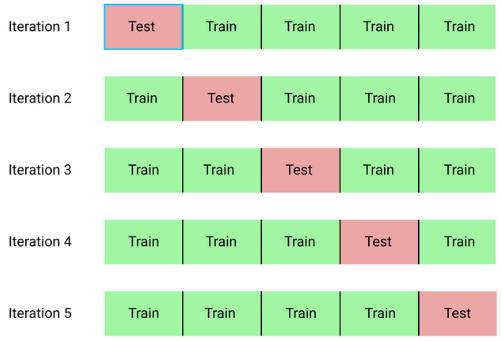

Мы обсуждали и иллюстрировали, что решающее дерево легко переобучается. Посмотрим на стабильность этой и других инициализированных моделей. Исполнение кода ниже займет время, так как на каждой итерации цикла обучается 4 различные модели.

In [42]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=3)
    print(name, 'Cross-val accuracy:', scores)

    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(name, 'Test accuracy:', test_accuracy)
    print()

Decision Tree Cross-val accuracy: [0.96343073 0.96651967 0.96312963]
Decision Tree Test accuracy: 0.96485

Random Forest Cross-val accuracy: [0.97825043 0.97773978 0.97731977]
Random Forest Test accuracy: 0.97735

AdaBoost Cross-val accuracy: [0.90427191 0.94107941 0.93774938]
AdaBoost Test accuracy: 0.9097

XGBoost Cross-val accuracy: [0.97594048 0.97590976 0.97683977]
XGBoost Test accuracy: 0.9746

CatBoost Cross-val accuracy: [0.96952061 0.96864969 0.9702697 ]
CatBoost Test accuracy: 0.96895



Все алгоритмы показали высокую степень стабильности, за исключением AdaBoost. Используя лишь подход hold-out (разбиение на train и test), мы бы это не заметили.

#Выводы

В ходе данного занятия мы:

1. Ознакомились с общим устройством решающего дерева.
2. Рассмотрели подходы к ветвлению, остановке, предсказанию в листе дерева.
3. Вывели критерий информативности. Привели пример с энтропией Шеннона.
4. Классифицировали ирисы Фишера.
5. Указали недостатки решающих деревьев.
6. Познакомились с бэггингом и бустингом.
7. Решили задачу с Kaggle на классификацию небесных тел.
8. Научились пользоваться кроссвалидацией.


##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Воронцов, К. В. Математические модели машинного обучения: логические методы классификации : [курс лекций]. – Текст : электронный / К. В. Воронцов ; МФТИ. – Москва, 2025. – URL: http://www.machinelearning.ru/wiki/images/9/97/Voron-ML-Logic-slides.pdf (дата обращения: 09.11.2025).
2. Губко, П. Ансамбли в машинном обучении. – Текст : электронный / П. Губко, Е. Елистратова ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/reshayushchiye-derevya (дата обращения: 01.11.2025).
3. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
4. Логит-анализ // MachineLearning.ru : [сайт]. – Москва. – URL: http://www.machinelearning.ru/wiki/index.php?title=Логит-анализ (дата обращения: 01.11.2025).
5. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
6. Синицин, Ф. Решающие деревья. – Текст : электронный / Ф. Синицин ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/reshayushchiye-derevya (дата обращения: 01.11.2025).


#Приложения. Код для построения иллюстраций

##Дерево решений в банковском скоринге. Классификация

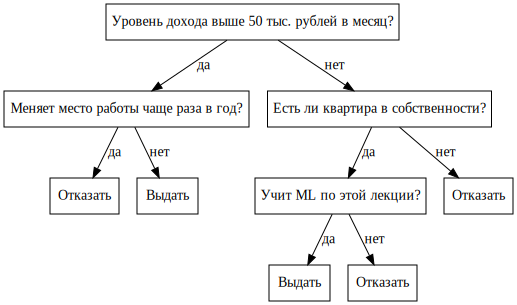

In [ ]:
from graphviz import Digraph

dot = Digraph(node_attr={'shape': 'box'})

dot.node('A', label='Уровень дохода выше 50 тыс. рублей в месяц?')
dot.node('B', label='Меняет место работы чаще раза в год?')
dot.node('C', label='Есть ли квартира в собственности?')
dot.node('D', label='Учит ML по этой лекции?')
dot.node('E', label='Отказать')
dot.node('F', label='Выдать')
dot.node('G', label='Отказать')
dot.node('H', label='Выдать')
dot.node('I', label='Отказать')

dot.edge('A', 'B', label='да')
dot.edge('A', 'C', label='нет')
dot.edge('B', 'E', label='да')
dot.edge('B', 'F', label='нет')
dot.edge('C', 'D', label='да')
dot.edge('C', 'G', label='нет')
dot.edge('D', 'H', label='да')
dot.edge('D', 'I', label='нет')

dot

##Дерево решений в банковском скоринге. Регрессия

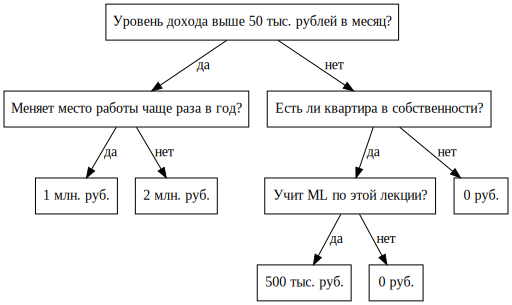

In [ ]:
from graphviz import Digraph

dot = Digraph(node_attr={'shape': 'box'})

dot.node('A', label='Уровень дохода выше 50 тыс. рублей в месяц?')
dot.node('B', label='Меняет место работы чаще раза в год?')
dot.node('C', label='Есть ли квартира в собственности?')
dot.node('D', label='Учит ML по этой лекции?')
dot.node('E', label='1 млн. руб.')
dot.node('F', label='2 млн. руб.')
dot.node('G', label='0 руб.')
dot.node('H', label='500 тыс. руб.')
dot.node('I', label='0 руб.')

dot.edge('A', 'B', label='да')
dot.edge('A', 'C', label='нет')
dot.edge('B', 'E', label='да')
dot.edge('B', 'F', label='нет')
dot.edge('C', 'D', label='да')
dot.edge('C', 'G', label='нет')
dot.edge('D', 'H', label='да')
dot.edge('D', 'I', label='нет')

dot

##Разделение шариков перегородкой

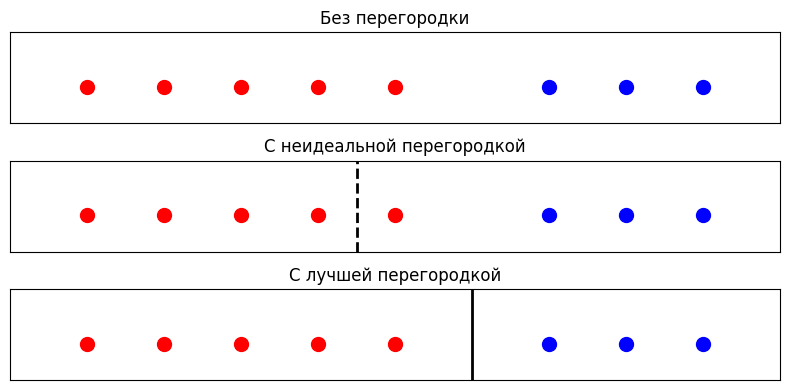

In [ ]:
import matplotlib.pyplot as plt

red_balls = 5
blue_balls = 3

x_red = [i for i in range(red_balls)]
y_red = [0.1] * red_balls
x_blue = [i + red_balls + 1 for i in range(blue_balls)]
y_blue = [0.1] * blue_balls

separators = [None, red_balls - 1.5, red_balls]
titles = ['Без перегородки', 'С неидеальной перегородкой', 'С лучшей перегородкой']

plt.figure(figsize=(8, 4))

for i in range(3):
    plt.subplot(3, 1, i + 1)
    plt.scatter(x_red, y_red, color='red', s=100)
    plt.scatter(x_blue, y_blue, color='blue', s=100)

    if separators[i] is not None:
        plt.axvline(x=separators[i], color='black', linestyle='--' if i == 1 else '-', linewidth=2)

    plt.title(titles[i])
    plt.xlim(-1, red_balls + blue_balls + 1)
    plt.ylim(-0.5, 1)
    plt.yticks([])
    plt.xticks([])

plt.tight_layout()
plt.show()


##Переобучение дерева

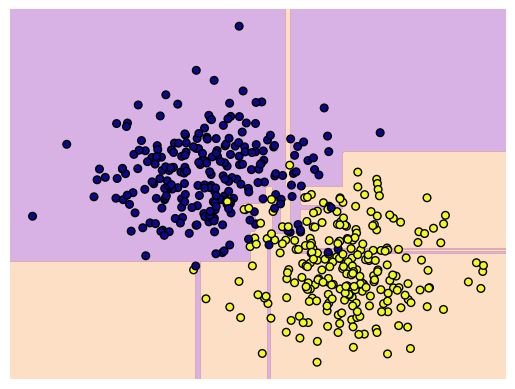

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=500, centers=2, cluster_std=3.0, random_state=42)

tree = DecisionTreeClassifier(max_depth=10)
visualize_classifier(tree, X, y)